Important: Each sequence of cells separate by large headers (# in markdown) can be run separately
Each sequence of cells under the same large header should be run sequentially from top to bottom.

# Testing of SVT algorithm with artifical data and given rank

In [7]:
import utils
import svt
import time
import numpy as np

# compute the performance of the prediction
# returns the max error in the given locations, the relative error between the Frobenius norm respect to actual matrix,
# and the rank.
def compute_performance(actual_matrix, predicted_matrix, locations):
    diff = []
    for k in range(len(locations[0])):
        i=locations[0][k]
        j=locations[1][k]
        diff.append(abs(actual_matrix[i,j] - predicted_matrix[i,j])) 
    max_diff = max(diff)

    # compute the relative error between the actual matrix and the resultant matrix
    rel_error = np.linalg.norm(actual_matrix - predicted_matrix, ord='fro') / np.linalg.norm(actual_matrix, ord='fro')

    # compute the rank of the predicted matrix
    u,s,v = np.linalg.svd(predicted_matrix)
    rank = sum(s>0.001)
    return max_diff, rel_error, rank
    

def bulk_test_small_matrices_given_rank(width, height, fixed_entries_num, rank, method = "normal", scale = 1.0, num_trials = 5):
    max_errors = []
    rel_errors = []
    ranks = []
    time_elapsed = []
    for k in range(num_trials):
        # generate a matrix with given rank
        actual_M = utils.generate_matrix_rank(width, height, rank, method = method, scale = scale)
        # generate random locations (of entries) to pass to the sparse matrix
        locations = utils.convert_locations( utils.generate_locations(width, height, fixed_entries_num) )
        # with the locations, create a sparse matrix
        M = utils.filter_locations(actual_M, locations)
        
        # using SVT algorithm, predict the original matrix from the sparse matrix
        time_svt = time.time()
        result = svt.svt_algorithm_auto_params_known_rank(M, locations, rank = rank, log=False)
        time_svt = int(time.time()-time_svt)
        print("time elasped: ", time_svt, " s")
        
        max_diff, rel_error, rank = compute_performance(actual_M, result, locations)
        print("diff on locations:  ",max_diff,"relative error:  ",rel_error, "rank:  ", rank)
        max_errors.append(max_diff)
        rel_errors.append(rel_error)
        ranks.append(rank)
        time_elapsed.append(time_svt)
        
    print("average absolute error: ", np.mean(np.array(max_errors))," average relative error: ", np.mean(np.array(rel_errors)), " average time elapsed: ", np.mean(np.array(time_elapsed)))

## 1000x1000 matrices

In [8]:
print("------------Testing 1000x1000------------")
print("--------Normal, scale=1.0--------")
bulk_test_small_matrices_given_rank(1000, 1000, 120000, 10, method = "normal", scale = 1.0)
bulk_test_small_matrices_given_rank(1000, 1000, 390000, 50, method = "normal", scale = 1.0)
bulk_test_small_matrices_given_rank(1000, 1000, 570000, 100, method = "normal", scale = 1.0)

------------Testing 1000x1000------------
--------Normal, scale=1.0--------
Step size:  10.0     tau:  5000
time elasped:  11  s
diff on locations:   0.046190206429110425 relative error:   0.0016097907925230828 rank:   10
Step size:  10.0     tau:  5000
time elasped:  10  s
diff on locations:   0.04135920168596652 relative error:   0.0016374361589759918 rank:   10
Step size:  10.0     tau:  5000
time elasped:  11  s
diff on locations:   0.054122394551133546 relative error:   0.0016193869092121804 rank:   10
Step size:  10.0     tau:  5000
time elasped:  11  s
diff on locations:   0.040775065526969634 relative error:   0.0016363353470373848 rank:   10
Step size:  10.0     tau:  5000
time elasped:  11  s
diff on locations:   0.04077564975845416 relative error:   0.0015904230845558032 rank:   10
average absolute error:  0.04464450359032686  average relative error:  0.0016186744584608885  average time elapsed:  10.8
Step size:  3.076923076923077     tau:  5000
time elasped:  45  s
diff on 

In [7]:
print("------------Testing 1000x1000------------")
print("--------Uniform, scale=1.0--------")
bulk_test_small_matrices_given_rank(1000, 1000, 120000, 10, method = "uniform", scale = 1.0)
bulk_test_small_matrices_given_rank(1000, 1000, 390000, 50, method = "uniform", scale = 1.0)

------------Testing 1000x1000------------
--------Uniform, scale=1.0--------
Step size:  10.0     tau:  5000
time elasped:  40  s
diff on locations:   0.023363620567845134 relative error:   0.0015107345155148306 rank:   10
Step size:  10.0     tau:  5000
time elasped:  42  s
diff on locations:   0.024201306983825388 relative error:   0.0015166416591069116 rank:   10
Step size:  10.0     tau:  5000
time elasped:  40  s
diff on locations:   0.025149492633635973 relative error:   0.0015174344424294674 rank:   10
Step size:  10.0     tau:  5000
time elasped:  41  s
diff on locations:   0.02107851369267255 relative error:   0.0015039401830352695 rank:   10
Step size:  10.0     tau:  5000
time elasped:  41  s
diff on locations:   0.020953770747068168 relative error:   0.0015065301446646469 rank:   10
average absolute error:  0.022949340925009443  average relative error:  0.0015110561889502255  average time elapsed:  40.8
Step size:  3.076923076923077     tau:  5000
time elasped:  601  s
diff

## 5000x5000 matrices

In [2]:
print("------------Testing 5000x5000------------")
bulk_test_small_matrices_given_rank(5000, 5000, 600000, 10, method = "normal", scale = 1.0)
bulk_test_small_matrices_given_rank(5000, 5000, 600000, 10, method = "uniform", scale = 1.0)

------------Testing 5000x5000------------
Step size:  50.0     tau:  25000
time elasped:  172  s
diff on locations:   0.056700561796979354 relative error:   0.001668984079013127 rank:   10
Step size:  50.0     tau:  25000
time elasped:  179  s
diff on locations:   0.06161376600727131 relative error:   0.0016262885987490623 rank:   10
Step size:  50.0     tau:  25000
time elasped:  168  s
diff on locations:   0.05804636685450504 relative error:   0.0016563405409970307 rank:   10
Step size:  50.0     tau:  25000
time elasped:  168  s
diff on locations:   0.06548888111360007 relative error:   0.0016902205980904444 rank:   10
Step size:  50.0     tau:  25000
time elasped:  168  s
diff on locations:   0.049076109412578006 relative error:   0.0016417363580301817 rank:   10
average absolute error:  0.05818513703698676  average relative error:  0.001656714034975969  average time elapsed:  171.0
Step size:  50.0     tau:  25000
time elasped:  638  s
diff on locations:   0.032647412817455645 rel

# Comparison of SVT algorithm with gradient descent

In [1]:
import utils
import svt
import time
import numpy as np
import descent

# same function as above
def compute_performance(actual_matrix, predicted_matrix, locations):
    diff = []
    for k in range(len(locations[0])):
        i=locations[0][k]
        j=locations[1][k]
        diff.append(abs(actual_matrix[i,j] - predicted_matrix[i,j])) 
    max_diff = max(diff)

    # compute the relative error between the actual matrix and the resultant matrix
    rel_error = np.linalg.norm(actual_matrix - predicted_matrix, ord='fro') / np.linalg.norm(actual_matrix, ord='fro')

    # compute the rank of the resultant matrix
    u,s,v = np.linalg.svd(predicted_matrix)
    rank = sum(s>0.001)
    return max_diff, rel_error, rank

# comparison of SVT with gradient descent
def bulk_compare_small_matrices_given_rank(width, height, fixed_entries_num, rank, method = "normal", scale = 1.0, num_trials = 5):
    max_errors_SVT = []
    rel_errors_SVT = []
    ranks_SVT = []
    time_elapsed_SVT = []
    
    max_errors_descent = []
    rel_errors_descent = []
    ranks_descent = []
    time_elapsed_descent = []
    for k in range(num_trials):
        # generate a matrix with given rank
        actual_M = utils.generate_matrix_rank(width, height, rank, method = method, scale = scale)
        # generate random locations (of entries) to pass to the sparse matrix
        locations = utils.convert_locations( utils.generate_locations(width, height, fixed_entries_num) )
        # with the locations, create a sparse matrix
        M = utils.filter_locations(actual_M, locations)
        
        # using SVT algorithm, predict the original matrix from the sparse matrix
        time_svt = time.time()
        result = svt.svt_algorithm_auto_params_known_rank(M, locations, rank = rank, log=False, tolerance = 0.01)
        time_svt = int(time.time()-time_svt)
        print("time elasped: ", time_svt, " s")
        
        # compute the absolute difference of values in entries in the locations,
        # for the actual matrix and the resultant matrix
        max_diff, rel_error, rank = compute_performance(actual_M, result, locations)
        
        print("diff on locations:  ",max_diff,"relative error:  ",rel_error, "rank:  ", rank, "     (SVT)")
        max_errors_SVT.append(max_diff)
        rel_errors_SVT.append(rel_error)
        ranks_SVT.append(rank)
        time_elapsed_SVT.append(time_svt)
        
        
        # using gradient descent, predict the original matrix from the sparse matrix
        time_descent = time.time()
        result = descent.gradient_descent_completion(M, locations, rank = rank, log=False, tolerance = 0.01)
        time_descent = int(time.time()-time_descent)
        print("time elasped: ", time_descent, " s")
        
        # compute the absolute difference of values in entries in the locations,
        # for the actual matrix and the resultant matrix
        max_diff, rel_error, rank = compute_performance(actual_M, result, locations)
        
        print("diff on locations:  ",max_diff,"relative error:  ",rel_error, "rank:  ", rank, "     (descent)")
        max_errors_descent.append(max_diff)
        rel_errors_descent.append(rel_error)
        ranks_descent.append(rank)
        time_elapsed_descent.append(time_descent)
    print("average absolute error: ", np.mean(np.array(max_errors_SVT))," average relative error: ", np.mean(np.array(rel_errors_SVT)), " average time elapsed: ", np.mean(np.array(time_elapsed_SVT)), "    (SVT)")
    print("average absolute error: ", np.mean(np.array(max_errors_descent))," average relative error: ", np.mean(np.array(rel_errors_descent)), " average time elapsed: ", np.mean(np.array(time_elapsed_descent)), "    (descent)")

## 1000x1000 matrices

In [2]:
print("------------Testing 1000x1000------------")
print("--------Normal, scale=1.0--------")
bulk_compare_small_matrices_given_rank(1000, 1000, 120000, 10, method = "normal", scale = 1.0)
bulk_compare_small_matrices_given_rank(1000, 1000, 390000, 50, method = "normal", scale = 1.0)
bulk_compare_small_matrices_given_rank(1000, 1000, 570000, 100, method = "normal", scale = 1.0)

------------Testing 1000x1000------------
--------Normal, scale=1.0--------
Step size:  10.0     tau:  5000
time elasped:  6  s
diff on locations:   0.3698921624713458 relative error:   0.0158726599015314 rank:   10      (SVT)
torch.Size([1000, 10])
torch.Size([1000, 10])
time elasped:  284  s
diff on locations:   0.4070930164608395 relative error:   0.01594072610270143 rank:   10      (descent)
Step size:  10.0     tau:  5000
time elasped:  5  s
diff on locations:   0.3318315491827324 relative error:   0.015676259758860254 rank:   10      (SVT)
torch.Size([1000, 10])
torch.Size([1000, 10])
time elasped:  346  s
diff on locations:   0.6246149897106896 relative error:   0.015998973277102813 rank:   10      (descent)
Step size:  10.0     tau:  5000
time elasped:  5  s
diff on locations:   0.3284352142498612 relative error:   0.015343434424884542 rank:   10      (SVT)
torch.Size([1000, 10])
torch.Size([1000, 10])
time elasped:  306  s
diff on locations:   0.5675267224894345 relative error

## 5000x5000 matrices

In [3]:
print("------------Testing 5000x5000------------")
bulk_compare_small_matrices_given_rank(5000, 5000, 600000, 10, method = "normal", scale = 1.0, num_trials = 3)

------------Testing 5000x5000------------
Step size:  50.0     tau:  25000
time elasped:  83  s
diff on locations:   0.4634906100885061 relative error:   0.015550858205153622 rank:   10      (SVT)
torch.Size([5000, 10])
torch.Size([5000, 10])
time elasped:  2567  s
diff on locations:   0.5818949436681358 relative error:   0.01638317606658432 rank:   10      (descent)
Step size:  50.0     tau:  25000
time elasped:  79  s
diff on locations:   0.3316679103173731 relative error:   0.015210209428225154 rank:   10      (SVT)
torch.Size([5000, 10])
torch.Size([5000, 10])
time elasped:  2068  s
diff on locations:   0.43889870315511414 relative error:   0.01642233652914515 rank:   10      (descent)
Step size:  50.0     tau:  25000
time elasped:  99  s
diff on locations:   0.37615103489875423 relative error:   0.015918936495274816 rank:   10      (SVT)
torch.Size([5000, 10])
torch.Size([5000, 10])
time elasped:  1892  s
diff on locations:   0.5930816483757457 relative error:   0.0164832803485644

# SVT algorithm with logs (large matrices)

Step size:  24.0     tau:  50000
fro:  15822.868187420558     nuc: 0.0      last rank: 0
fro:  15822.868187420558     nuc: 0.0      last rank: 0
fro:  15822.868187420558     nuc: 0.0      last rank: 0
fro:  15822.868187420558     nuc: 0.0      last rank: 0
fro:  11319.030394915182     nuc: 6976.9977332406925      last rank: 44
fro:  8090.533476616989     nuc: 11440.343091613897      last rank: 50
fro:  5783.231496054918     nuc: 7465.278706156394      last rank: 50
fro:  4173.22299476547     nuc: 10646.286710075154      last rank: 50
fro:  3237.1991565395356     nuc: 9246.040084572633      last rank: 50
fro:  2663.5041970328975     nuc: 10230.11891206503      last rank: 50
fro:  2278.388669258814     nuc: 9996.36635876025      last rank: 50
fro:  1982.058035480924     nuc: 10269.808748377509      last rank: 50
fro:  1741.6146381055107     nuc: 10299.847252400577      last rank: 50
fro:  1540.1578739071163     nuc: 10402.922566859954      last rank: 50
fro:  1369.3426782972927     nuc: 

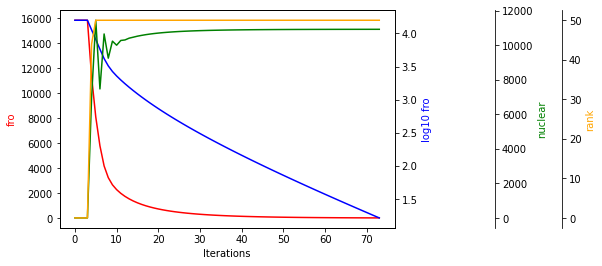

time elasped:  2144  s
diff on locations:   0.07546449916340414 relative error:   0.0016059550469164096 rank:   50


In [1]:
import utils
import svt
import time
import numpy as np

# same function as above
def compute_performance(actual_matrix, predicted_matrix, locations):
    diff = []
    for k in range(len(locations[0])):
        i=locations[0][k]
        j=locations[1][k]
        diff.append(abs(actual_matrix[i,j] - predicted_matrix[i,j])) 
    max_diff = max(diff)

    # compute the relative error between the actual matrix and the resultant matrix
    rel_error = np.linalg.norm(actual_matrix - predicted_matrix, ord='fro') / np.linalg.norm(actual_matrix, ord='fro')

    # compute the rank of the predicted matrix
    u,s,v = np.linalg.svd(predicted_matrix)
    rank = sum(s>0.001)
    return max_diff, rel_error, rank

def test_single_matrix(width, height, fixed_entries_num, rank, method = "normal", scale = 1.0):
    # generate a matrix with given rank
    actual_M = utils.generate_matrix_rank(width, height, rank, method = method, scale = scale)
    # generate random locations (of entries) to pass to the sparse matrix
    locations = utils.convert_locations( utils.generate_locations(width, height, fixed_entries_num) )
    # with the locations, create a sparse matrix
    M = utils.filter_locations(actual_M, locations)

    # using SVT algorithm, predict the original matrix from the sparse matrix
    time_svt = time.time()
    result = svt.svt_algorithm_auto_params_known_rank(M, locations, rank = rank, log=True)
    time_svt = int(time.time()-time_svt)
    print("time elasped: ", time_svt, " s")

    max_diff, rel_error, rank = compute_performance(actual_M, result, locations)
    print("diff on locations:  ",max_diff,"relative error:  ",rel_error, "rank:  ", rank)

test_single_matrix(10000, 10000, 5000000, 50)

# Gradient descent algorithm with logs

In [1]:
import utils
import time
import numpy as np
import descent

# same function as above
def compute_performance(actual_matrix, predicted_matrix, locations):
    diff = []
    for k in range(len(locations[0])):
        i=locations[0][k]
        j=locations[1][k]
        diff.append(abs(actual_matrix[i,j] - predicted_matrix[i,j])) 
    max_diff = max(diff)

    # compute the relative error between the actual matrix and the resultant matrix
    rel_error = np.linalg.norm(actual_matrix - predicted_matrix, ord='fro') / np.linalg.norm(actual_matrix, ord='fro')

    # compute the rank of the predicted matrix
    u,s,v = np.linalg.svd(predicted_matrix)
    rank = sum(s>0.001)
    return max_diff, rel_error, rank

def test_single_matrix(width, height, fixed_entries_num, rank, method = "normal", scale = 1.0):
    # generate a matrix with given rank
    actual_M = utils.generate_matrix_rank(width, height, rank, method = method, scale = scale)
    # generate random locations (of entries) to pass to the sparse matrix
    locations = utils.convert_locations( utils.generate_locations(width, height, fixed_entries_num) )
    # with the locations, create a sparse matrix
    M = utils.filter_locations(actual_M, locations)

    # using SVT algorithm, predict the original matrix from the sparse matrix
    time_svt = time.time()
    result = descent.gradient_descent_completion(M, locations, rank = rank, log=True, tolerance = 0.01)
    time_svt = int(time.time()-time_svt)
    print("time elasped: ", time_svt, " s")

    max_diff, rel_error, rank = compute_performance(actual_M, result, locations)
    print("diff on locations:  ",max_diff,"relative error:  ",rel_error, "rank:  ", rank)

test_single_matrix(1000, 1000, 120000, 10)

epoch:  40   loss:  1411.8463089160944   quotient loss:  1.2851426895035423
epoch:  80   loss:  1324.671940519614   quotient loss:  1.2057916287334545
epoch:  120   loss:  1265.331181944079   quotient loss:  1.1517763003005097
epoch:  160   loss:  1222.8729492469772   quotient loss:  1.1131284056852586
epoch:  200   loss:  1191.2326598947832   quotient loss:  1.0843276174564278
epoch:  240   loss:  1166.8206803103894   quotient loss:  1.0621064472758865
epoch:  280   loss:  1147.3964550232845   quotient loss:  1.0444254143126335
epoch:  320   loss:  1131.4982876699373   quotient loss:  1.0299539995264564
epoch:  360   loss:  1118.135837007293   quotient loss:  1.0177907380761835
epoch:  400   loss:  1106.6149962837121   quotient loss:  1.0073038145779654
epoch:  440   loss:  1096.4344485649838   quotient loss:  0.9980369018883609
epoch:  480   loss:  1087.2212286374838   quotient loss:  0.9896505058891357
epoch:  520   loss:  1078.6906414723362   quotient loss:  0.9818854809970999
epoc

epoch:  4320   loss:  276.19616274036105   quotient loss:  0.2514094325799596
epoch:  4360   loss:  271.4613951605274   quotient loss:  0.24709957824008244
epoch:  4400   loss:  266.5041627254629   quotient loss:  0.24258722375513575
epoch:  4440   loss:  261.31246262855507   quotient loss:  0.23786144348889826
epoch:  4480   loss:  255.87808376256064   quotient loss:  0.23291476322524615
epoch:  4520   loss:  250.19698489390314   quotient loss:  0.22774350440387545
epoch:  4560   loss:  244.26975035296533   quotient loss:  0.2223481989154848
epoch:  4600   loss:  238.10190996976485   quotient loss:  0.21673388032539673
epoch:  4640   loss:  231.7041149289326   quotient loss:  0.21091024394674596
epoch:  4680   loss:  225.0921946531021   quotient loss:  0.20489169861897064
epoch:  4720   loss:  218.28702792997115   quotient loss:  0.19869724940034517
epoch:  4760   loss:  211.31417294516712   quotient loss:  0.19235016080288383
epoch:  4800   loss:  204.2033778644467   quotient loss:  